In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from skimage import draw

In [365]:
num_imgs = 50000

img_size = 40
min_object_size = 7
max_object_size = 20
num_objects = 3
num_shapes = 3
num_colors = 3

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size, 3)) + 1
shapes = np.zeros((num_imgs, num_objects), dtype = int)
shape_labels = ['rectangle', 'circle', 'triangle']
colors = np.zeros((num_imgs, num_objects), dtype = int)
color_labels = ['r', 'g', 'b']

for i_img in range(num_imgs):
    
    for i_object in range(num_objects):
        shape = np.random.randint(num_shapes)
        shapes[i_img, i_object] = shape
        color = np.random.randint(num_colors)
        colors[i_img, i_object] = color
        rgb = np.zeros(3)
        
        # TODO: Introduce some variation to the colors by adding a small random offset to the rgb values.
        max_offset = 0.02
        r_offset, g_offset, b_offset = max_offset * (np.random.rand(3) - 0.5)
        if color == 0:
            rgb = (1 - abs(r_offset), 0 + g_offset, 0 + b_offset)
        elif color == 1:
            rgb = (0 + r_offset, 1 - abs(g_offset), 0 + b_offset)
        else:
            rgb = (0 + r_offset, 0 + g_offset, 1 - abs(b_offset))
            
        if shape == 0: # rectangle
            w, h = np.random.randint(min_object_size, max_object_size, size = 2)
            x = np.random.randint(0, img_size - w)
            y = np.random.randint(0, img_size - h)
            imgs[i_img, x:x + w, y:y + h] = rgb
            bboxes[i_img, i_object] = [x, y, w, h]
            
        elif shape == 1: # circle
            r = 0.5 * np.random.randint(min_object_size, max_object_size)
            r = (r + 0.5) - (r % 1)
            x = np.random.randint(r, img_size - r)
            y = np.random.randint(r, img_size - r)
            bboxes[i_img, i_object] = [x - r, y - r, 2 * r, 2 * r]
            r, c = draw.circle(x, y, radius = r, shape = (40, 40))
            imgs[i_img, r, c] = rgb
            
        else: # triangle
            size = np.random.randint(min_object_size, max_object_size)
            x, y = np.random.randint(0, img_size - size, size = 2)
            mask = np.tril_indices(size)
            imgs[i_img, x + mask[0], y + mask[1]] = rgb
            bboxes[i_img, i_object] = [x, y, size, size]
            
imgs = imgs * 255
imgs = imgs.astype(np.uint8)

imgs.shape, bboxes.shape, shapes.shape, colors.shape

((50000, 40, 40, 3), (50000, 3, 4), (50000, 3), (50000, 3))

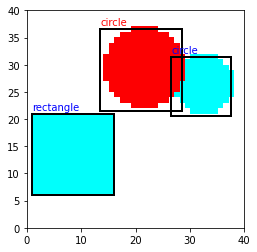

In [461]:
i = np.random.randint(num_imgs)
plt.imshow(np.transpose(imgs[i], (1, 0, 2)), interpolation = 'none', origin = 'lower', extent = [0, img_size, 0, img_size])
for bbox, shape, color in zip(bboxes[i], shapes[i], colors[i]):
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], lw = 2, ec = 'k', fc = 'none'))
    plt.annotate(shape_labels[shape], (bbox[0], bbox[1] + bbox[3] + 0.7), color = color_labels[color], clip_on = False)